In [ ]:
# Kernel PCA can be a bit tricky. We are not using the Kernel PCA 
# to map the linear boundary line but the points and finding the variance it the higher dimension

- <img src="../../images/kernelpca.png" alt="Drawing" style="width: 200px;"/>
- <img src="../../images/kernelpca_1.png" alt="Drawing" style="width: 200px;"/>
- The data points that are around, when projected into the higher dimension will have the greatest variance!

In [ ]:
# Feature Selection: Backward Elimination, Forward Elimination, Bidirectional Elimination, Score Comparision
# Feature Extraction: PCA, LDA, Kernel PCA

In [ ]:
# Kernel can be mapped to a higher dimension
# The kernel PCA can be use for non-linear models (they tend to show better performance)

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [11]:
# Loading up the dataset

df = pd.read_csv('../../archive/Social_Network_Ads.csv')
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [13]:
# Setting up the X and y values
y = df['Purchased']
Xs = df.drop(['User ID', 'Purchased', 'EstimatedSalary'], axis=1)

# Fixing the categorical data
gender_dummies = pd.get_dummies(df['Gender'])
gender_dummies = gender_dummies['Female']

pd.to_numeric(gender_dummies, errors='coerce')
Xs = pd.concat([Xs, gender_dummies], axis=1)

Xs.drop(['Gender'], inplace=True, axis=1)
Xs.head()

,Age,Female
0,19.0,0
1,35.0,0
2,26.0,1
3,27.0,1
4,19.0,0


In [14]:
# Splitting the data set into training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=0)

In [15]:
# Feature Scaling: This is requried we are performing PCA's or LDA's
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)

# We are only using the transform and not the fit transform because we already fit the model
X_test = sc.transform(X_test)

In [16]:
# Applying Kernel PCA's

from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2, kernel='rbf') # We will create a vector of possible n components
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

In [17]:
# Fitting the classifier to the training set

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
# Predicting the values of the testing set

y_pred = classifier.predict(X_test)

In [19]:
# Making the classification matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

In [20]:
print("true pos: {0}\n"
  "false pos: {1}\n"
  "true neg: {2}\n"
  "false neg: {3}\n".format(tp, fp, tn, fn))

true pos: 18
false pos: 4
true neg: 54
false neg: 4



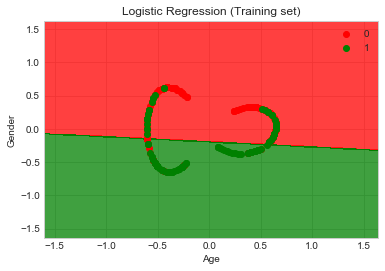

In [22]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Gender')
plt.legend()
plt.show()

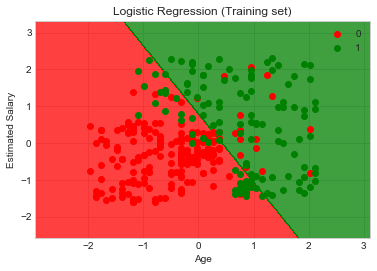

In [25]:
# Redoing the process with Estimated Salary and Age
Xs = df.drop(['User ID', 'Purchased', 'Gender'], axis=1)

# Splitting the data set into training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=0)

# Feature Scaling: This is requried we are performing PCA's or LDA's
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)

# We are only using the transform and not the fit transform because we already fit the model
X_test = sc.transform(X_test)

classifier.fit(X_train, y_train)

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

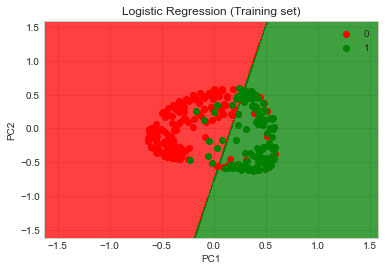

In [26]:
# Redoing the process with Estimated Salary and Age
Xs = df.drop(['User ID', 'Purchased', 'Gender'], axis=1)

# Splitting the data set into training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=0)

# Feature Scaling: This is requried we are performing PCA's or LDA's
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)

# We are only using the transform and not the fit transform because we already fit the model
X_test = sc.transform(X_test)

# Applying Kernel PCA's

from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2, kernel='rbf') # We will create a vector of possible n components
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

# Fitting the classifier to the training set
classifier.fit(X_train, y_train)

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()